# ***Project: Rainfall Prediction***

**By: Aditya Bijwar, Monish Jadhav, Pawan Waghmare, Dhanashree Gaikwad**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

raindata = pd.read_csv("rainfall.csv")
raindata.head()

,datetime,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,precipprob,preciptype
0,01-01-2016,28.4,11.9,37.8,1016.4,147.5,216.1,16.6,0,0
1,02-01-2016,26.8,13.0,44.8,1017.2,110.3,215.7,16.6,0,0
2,03-01-2016,25.5,14.6,52.8,1015.7,145.3,221.1,18.4,0,0
3,04-01-2016,26.4,13.1,46.6,1015.3,126.9,216.2,16.6,0,0
4,05-01-2016,27.1,13.5,44.9,1014.4,125.5,208.1,16.6,0,0


In [ ]:
print('Number of features: {}'.format(raindata.shape[1]))
print('Missing values: {}\n'.format(raindata.isnull().sum().sum()))

Number of features: 10
Missing values: 0



In [ ]:
raindata.drop(["datetime", "precipprob"], axis = 1).describe()

,temp,dew,humidity,sealevelpressure,winddir,solarradiation,windspeed,preciptype
count,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000,1781.000000
mean,28.342560,21.644975,69.565974,1008.878046,201.304267,228.169175,22.309882,0.456485
std,1.960027,4.532065,14.533809,3.706157,47.075559,57.034865,6.360669,0.498243
min,20.200000,5.000000,28.600000,994.100000,65.600000,52.800000,9.400000,0.000000
25%,27.200000,18.100000,58.000000,1006.200000,163.700000,194.600000,18.400000,0.000000
50%,28.500000,23.800000,71.600000,1009.100000,204.500000,232.300000,22.300000,0.000000
75%,29.700000,25.300000,81.200000,1011.800000,240.900000,274.400000,24.600000,1.000000
max,32.800000,27.500000,98.200000,1017.400000,316.000000,330.900000,128.100000,1.000000


<Axes: >

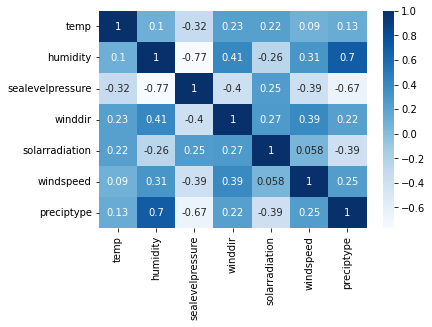

In [ ]:
raindata1 = raindata.drop(["datetime", "precipprob", "dew"], axis = 1) #dropping features not useful for analysis
corMatrix = pd.DataFrame.corr(raindata1)
corMatrix
sns.heatmap(corMatrix, annot = True, cmap = "Blues")

<ipython-input-6-701e31de0477>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fig_data[feature_name[i]])
<ipython-input-6-701e31de0477>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fig_data[feature_name[i]])
<ipython-input-6-701e31de0477>:6: UserWarning: 

`distplot` is a deprecated functi

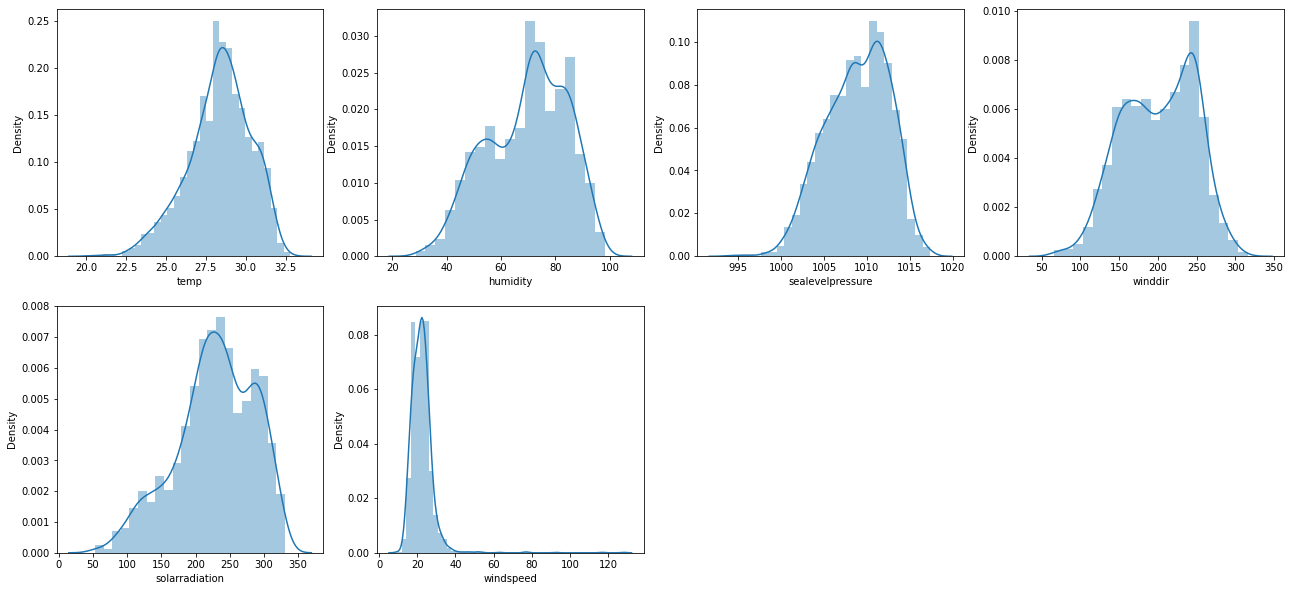

In [ ]:
fig_data = raindata1.drop("preciptype", axis = 1)
plt.figure(figsize= (22,10))
feature_name = list(["temp", "humidity", "sealevelpressure", "winddir", "solarradiation", "windspeed"])
for i in range(6):
    plt.subplot(2,4,i+1)
    sns.distplot(fig_data[feature_name[i]])

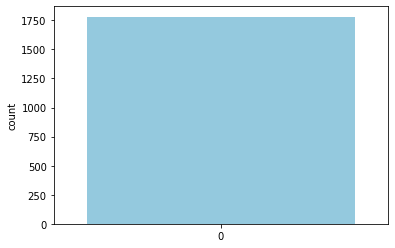

In [ ]:
sns.countplot(raindata1["preciptype"], palette = ["#87CEEB", "#191970"])
plt.show()

In [ ]:
#segment dataset into features set and target set
X = raindata1.loc[:, list(raindata1.columns)[0:6]]
y = raindata1.iloc[:,-1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_predicted = logistic_regression_model.predict(X_test)
display(y_predicted)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predicted)
print('\nThe Confusion Matrix is as follows:\n', confusion_matrix)


The Confusion Matrix is as follows:
 [[164  17]
 [ 25 151]]


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
print('\nArea Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_test, y_predicted))
print('\nPrecision:', precision_score(y_test, y_predicted))


Area Under the Receiver Operating Characteristic Curve: 0.8820159467604218

Precision: 0.8988095238095238


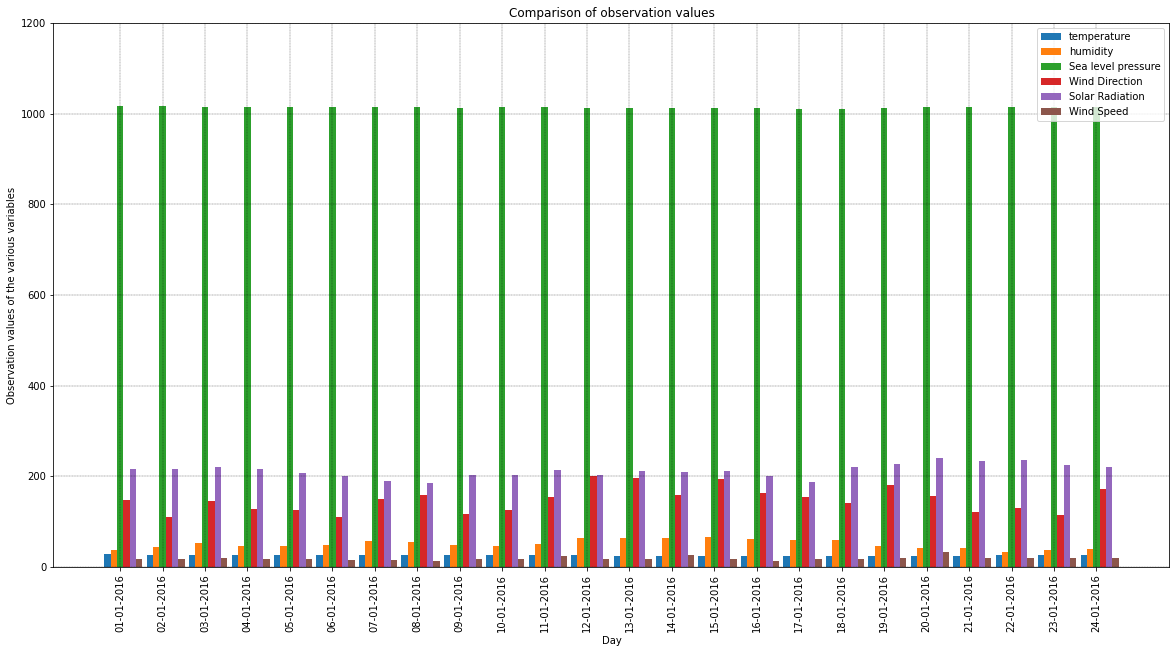

In [ ]:
day = raindata["datetime"].head(24)
temperature = raindata1["temp"].head(24)
humidity = raindata1["humidity"].head(24)
pressure = raindata1["sealevelpressure"].head(24)
winddirection = raindata1["winddir"].head(24)
radiation = raindata1["solarradiation"].head(24)
speed = raindata1["windspeed"].head(24)
fig, ax = plt.subplots(figsize =(20, 10))
x_axis = np.arange(len(day))
width = 0.15
plt.bar(x_axis - (2*width), temperature, width = width,label = "temperature")
plt.bar(x_axis - width, humidity, width = width, label = "humidity")
plt.bar(x_axis, pressure, width = width, label = "Sea level pressure")
plt.bar(x_axis+width, winddirection, width = width, label = "Wind Direction")
plt.bar(x_axis+(2*width), radiation, width = width, label = "Solar Radiation")
plt.bar(x_axis+(3*width), speed, width = width, label = "Wind Speed")
plt.ylim(0,1200)
plt.xticks(ticks = x_axis, labels = day, rotation = "vertical")
plt.title("Comparison of observation values")
plt.xlabel("Day")
plt.ylabel("Observation values of the various variables")
plt.grid(color = "black", linestyle = "--", linewidth = 0.3)
plt.legend()

In [ ]:
#normalising using z score method
raindata_scaled = raindata1.copy()
raindata_scaled = raindata_scaled.drop("preciptype", axis = 1)
for column in raindata_scaled.columns:
    raindata_scaled[column] = (raindata_scaled[column]-raindata_scaled[column].mean())/raindata_scaled[column].std()
    
display(raindata_scaled)

,temp,humidity,sealevelpressure,winddir,solarradiation,windspeed
0,0.029306,-2.185661,2.029583,-1.142934,-0.211610,-0.897686
1,-0.787010,-1.704025,2.245440,-1.933153,-0.218624,-0.897686
2,-1.450266,-1.153584,1.840708,-1.189668,-0.123945,-0.614697
3,-0.991089,-1.580176,1.732780,-1.580529,-0.209857,-0.897686
4,-0.633951,-1.697145,1.489941,-1.610268,-0.351876,-0.897686
...,...,...,...,...,...,...
1776,-0.480892,-1.931082,0.788405,-1.975638,-0.136218,-0.803356
1777,-0.174773,-1.972365,1.004262,-1.123816,-0.053812,-0.897686
1778,0.029306,-0.871483,0.815387,-1.476441,-0.083619,-0.614697
1779,0.590522,-0.568741,0.356691,-1.000610,0.079440,-0.473202


In [ ]:
raindata_scaled["preciptype"] = raindata1["preciptype"]
raindata_scaled.head()

,temp,humidity,sealevelpressure,winddir,solarradiation,windspeed,preciptype
0,0.029306,-2.185661,2.029583,-1.142934,-0.211610,-0.897686,0
1,-0.787010,-1.704025,2.245440,-1.933153,-0.218624,-0.897686,0
2,-1.450266,-1.153584,1.840708,-1.189668,-0.123945,-0.614697,0
3,-0.991089,-1.580176,1.732780,-1.580529,-0.209857,-0.897686,0
4,-0.633951,-1.697145,1.489941,-1.610268,-0.351876,-0.897686,0


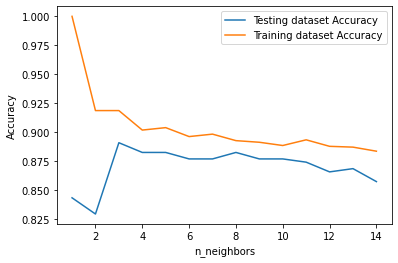

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
y = raindata_scaled["preciptype"].values
X = raindata_scaled.drop(columns=["preciptype"])


from sklearn.model_selection import cross_val_score
knn_cv = KNeighborsClassifier(n_neighbors = 3)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv = 5)
print(cv_scores)
print('cv scores mean:{}'.format(np.mean(cv_scores)))

[0.89122807 0.85614035 0.85263158 0.88070175 0.86267606]
cv scores mean:0.8686755621447986


In [ ]:
from sklearn.model_selection import GridSearchCV
kn = KNeighborsClassifier()
params = {
    'n_neighbors' : [1,15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_kn = GridSearchCV(estimator = kn,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(X_train, y_train)

print(grid_kn.best_estimator_)
print(grid_kn.best_params_)
print(grid_kn.score(X_test, y_test))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
KNeighborsClassifier(n_neighbors=15, weights='distance')
{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}
0.876750700280112


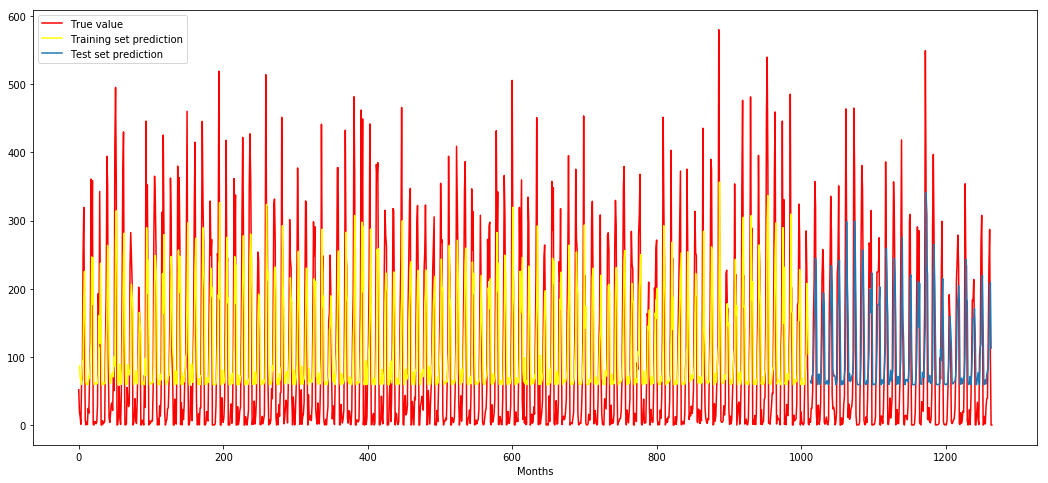